# DeepFace

## Installation

### 1. Install the model
Install the model from it's url:
#### Verification:
* [VGG Weights](https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5 "VGG Weights download link from github")
* [Facenet512 Weights](https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5 "Facenet512 Weights download link from github")
* [DlibResNet Weights](http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2 "DlibResNet Weights download link from github") <b>(Best on our project)</b>

### Detectors:

Emotion Detection: [Facial Expression Weights](https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 "Facial Expression Weights download link from github")

Face Detector: [Age Model Weights](https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 "Age Model Weights download link from github")

Face Detector: [Dlib Face Landmarks](http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2 "Dlib Shape Predictor  for face landmarks from dlib website") (You need to extract the `.dat` file from the `.bz2` file)

### 2. Put the all the files in it's folder

`<user folder path>\.deepface\weights`

In [8]:
from deepface import DeepFace
import matplotlib.pyplot as plt

In [1]:
#avaliable models with their sizes
#"VGG-Face 580mb", "Facenet 92mb", "Facenet512 95mb", "OpenFace 15mb", "DeepFace 95mb", "DeepID 1.6mb", "ArcFace 137mb"
#connect to proxy to be able to download the model

models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
metrics = ["cosine", "euclidean", "euclidean_l2"]
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

# Face Recognition

In [22]:
result = DeepFace.verify("../../images/m1.jpg", "../../images/m3.jpg",detector_backend=backends[4], distance_metric = metrics[2],model_name = models[0])
print(result)

{'verified': True, 'distance': 0.4772901644212495, 'max_threshold_to_verify': 0.86, 'model': 'VGG-Face', 'similarity_metric': 'euclidean_l2'}


# Face analysis for Age, Gender, Race and Emotion

In [23]:
obj = DeepFace.analyze(img_path = "../../images/me.jpg", actions = ['emotion',"age","gender"],detector_backend=backends[2],prog_bar=False)
print(obj)

{'emotion': {'angry': 0.00036034655295225093, 'disgust': 9.968693622311453e-11, 'fear': 0.0004497202553466195, 'happy': 0.0137378039653413, 'sad': 9.23864170908928, 'surprise': 9.325402672288874e-07, 'neutral': 90.74681401252747}, 'dominant_emotion': 'neutral', 'region': {'x': 664, 'y': 418, 'w': 555, 'h': 555}, 'age': 25, 'gender': 'Man'}


# Detect one face

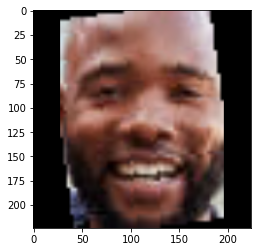

True

In [27]:
import cv2
import numpy as np

face = DeepFace.detectFace(img_path = "../../images/gg.jpg",  detector_backend = backends[3])
face = face * 255
face = np.array(face,np.uint8)
plt.imshow(face)
plt.show()
RGB = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
cv2.imwrite("./result/face.jpg",RGB)
